In [109]:
%load_ext autoreload
%autoreload 2
from solver_code_new import *
from solver_code import convection_diffusion_equation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.1
Execution time: 2.5272369384765625e-05 seconds for CDS.
Execution time: 2.5033950805664062e-05 seconds for UDS.
Execution time: 3.409385681152344e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_25_pe_2.50.eps is saved.
figures/phi_plot_grid_11_u_25_pe_2.50.png is saved.


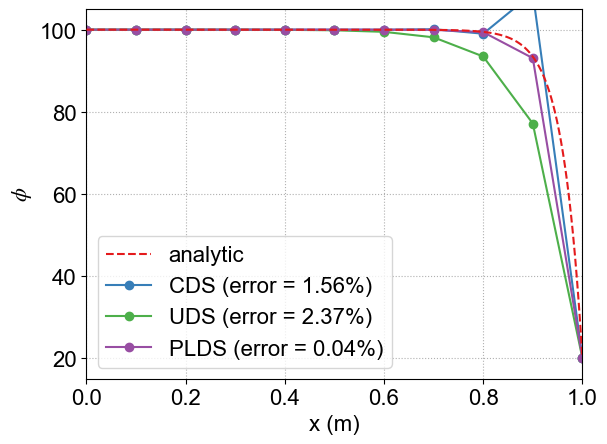

In [123]:
solver = convection_diffusion_equation(1.0, 0.5, 0.5, 100.0, 20.0)
number_of_grid = 11
u = 25
scheme_list = ['CDS', 'UDS', 'PLDS']
solver.plot_the_result(number_of_grid, u, scheme_list)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/flow_velocity_error_plot.eps is saved.
figures/flow_velocity_error_plot.png is saved.


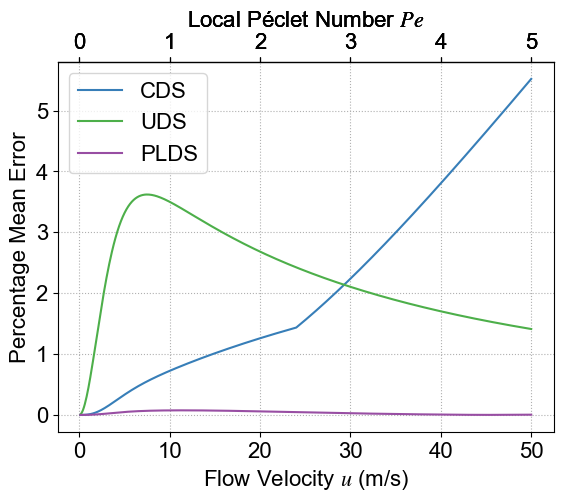

In [126]:
u_list = np.arange(0.1, 50.1, 0.1)

number_of_grid_list = [11]
solver.error_plot(u_list, number_of_grid_list, scheme_list, 'flow_velocity')

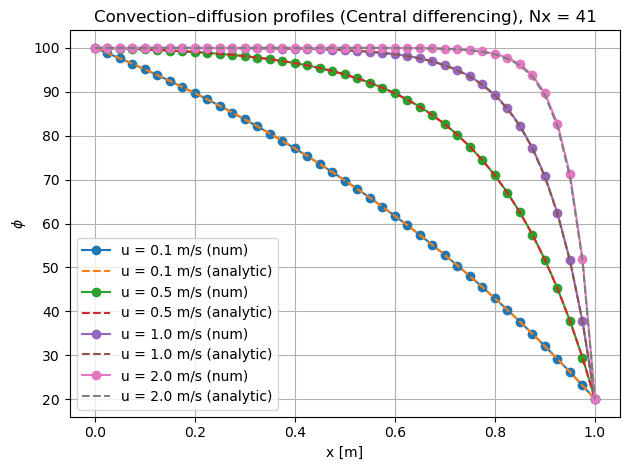

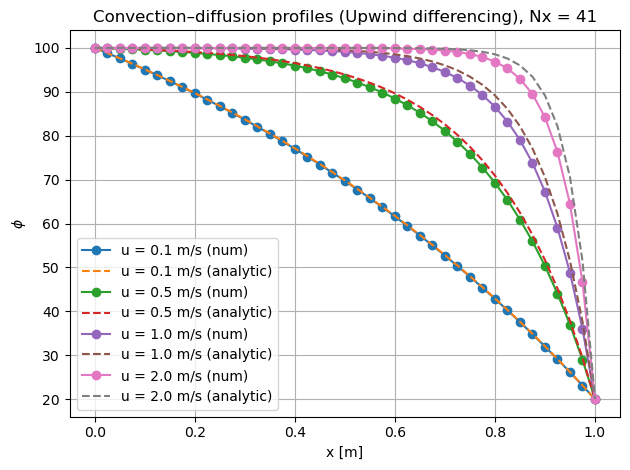

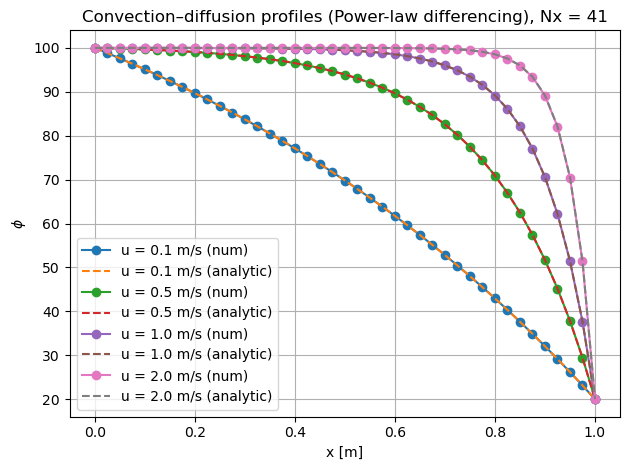

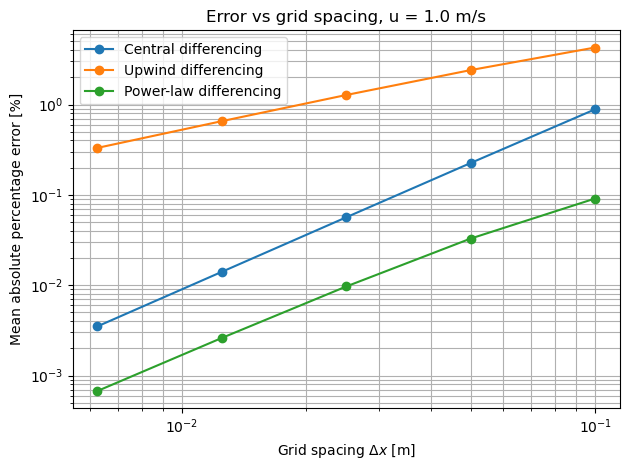

In [18]:
# velocities to test and grid sizes for error studies

L = 1.0             # domain length
rho = 1.0           # fluid density
Gamma = 0.1         # fluid diffusion coefficient
phi_0 = 100.0       # left boundary value
phi_L = 20.0        # right boundary value

velocities = [0.1, 0.5, 1.0, 2.0]        # m/s
Nx_list_error = [11, 21, 41, 81, 161]    # total points including boundaries
u_for_error_plot = 1.0                   # velocity used in error vs dx plots
Nx_for_profiles = 41                     # grid size used in profile plots


schemes = {"CD": "Central differencing",
           "UD": "Upwind differencing",
           "PL": "Power-law differencing"}


Nx = Nx_for_profiles

for scheme_id, scheme_name in schemes.items():
    plt.figure()
    for u in velocities:
        x, phi_num = solver(Nx, L, rho, u, Gamma, phi_0, phi_L, scheme_id)
        phi_exact, Pe = analytical_phi(x, L, rho, u, Gamma, phi_0, phi_L)
        plt.plot(x, phi_num, marker="o", linestyle="-", label=f"u = {u} m/s (num)")
        plt.plot(x, phi_exact, linestyle="--", label=f"u = {u} m/s (analytic)")

    plt.xlabel("x [m]")
    plt.ylabel(r"$\phi$")
    plt.title(f"Convection–diffusion profiles ({scheme_name}), Nx = {Nx}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()




plt.figure()
for scheme_id, scheme_name in schemes.items():
    dx_list = []
    err_list = []
    for Nx in Nx_list_error:
        x, phi_num = solver(
            Nx, L, rho, u_for_error_plot, Gamma, phi_0, phi_L, scheme_id
        )
        phi_exact, Pe = analytical_phi(x, L, rho, u_for_error_plot, Gamma, phi_0, phi_L)
        # use internal nodes only in the error, consistent with discretisation
        err = mean_absolute_percentage_error(phi_num[1:-1], phi_exact[1:-1])
        dx = L / (Nx - 1)
        dx_list.append(dx)
        err_list.append(err)

    plt.loglog(dx_list, err_list, marker="o", linestyle="-", label=scheme_name)

plt.xlabel(r"Grid spacing $\Delta x$ [m]")
plt.ylabel("Mean absolute percentage error [%]")
plt.title(f"Error vs grid spacing, u = {u_for_error_plot} m/s")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Execution time: 6.699562072753906e-05 seconds for CDS.
Execution time: 4.7206878662109375e-05 seconds for UDS.
Execution time: 8.606910705566406e-05 seconds for PLDS.
figures/phi_plot_grid_11_u_20_pe_2.00.eps is saved.
figures/phi_plot_grid_11_u_20_pe_2.00.png is saved.


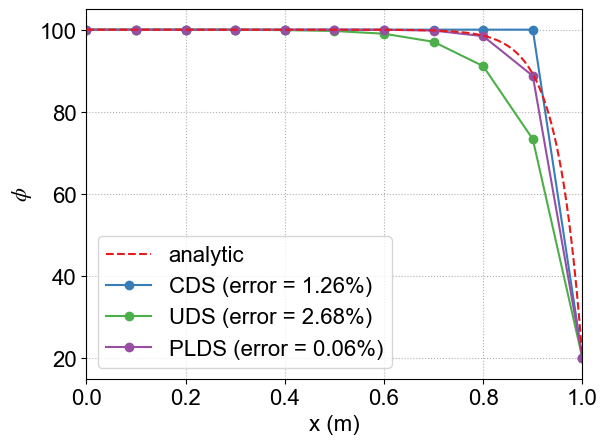

In [96]:
L = 1.0             # domain length
rho = 0.5           # fluid density
gamma = 0.5         # fluid diffusion coefficient
phi_0 = 100.0       # left boundary value
phi_L = 20.0        # right boundary value
number_of_grid = 11
u = 20
scheme_list = ['CDS', 'UDS', 'PLDS']
number_of_grid_list = np.arange(5, 100, 1)
plot_the_result(L, rho, gamma, phi_0, phi_L, number_of_grid, u, scheme_list)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/grid_size_error_plot.eps is saved.
figures/grid_size_error_plot.png is saved.


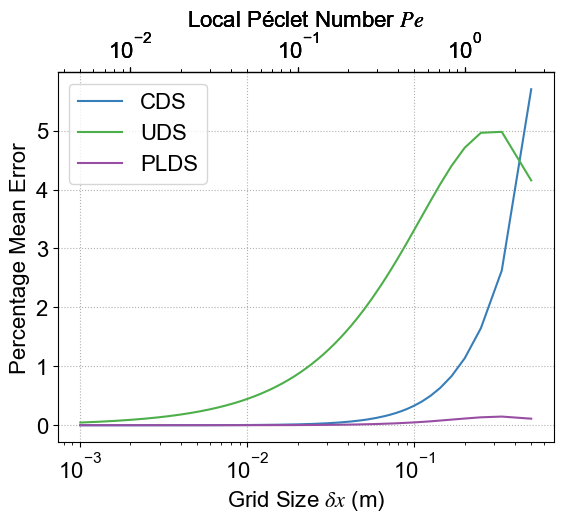

In [97]:
u_list = [5] #np.arange(0.1, 50.1, 0.1)

number_of_grid_list = np.arange(3, 1000, 1)

error_plot(L, rho, gamma, phi_0, phi_L, u_list, number_of_grid_list, scheme_list, 'grid_size')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


figures/flow_velocity_error_plot.eps is saved.
figures/flow_velocity_error_plot.png is saved.


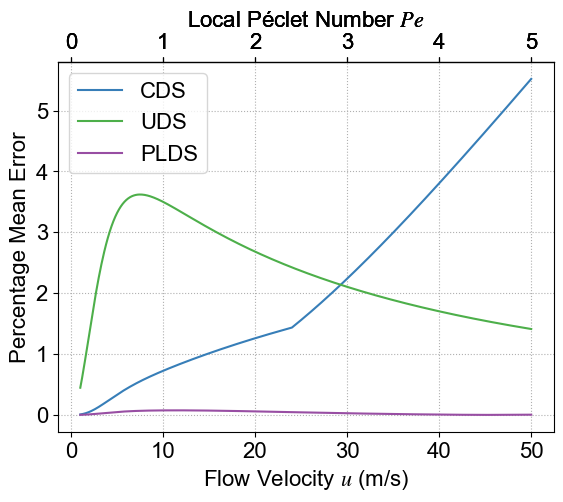

In [99]:
u_list = np.arange(1, 50.1, 0.1)

number_of_grid_list = [11]

error_plot(L, rho, gamma, phi_0, phi_L, u_list, number_of_grid_list, scheme_list, 'flow_velocity')

In [14]:
import time
import numpy as np

a = 5
b = 3
start_time = time.time()
c = b**a
end_time = time.time()
print(-start_time+end_time)


start_time = time.time()
c = a+b
end_time = time.time()
print(-start_time+end_time)

2.47955322265625e-05
2.09808349609375e-05
